# Assignment 2
### Understanding Uncertainty
### Due 9/12

Sabine Segaloff

### Problem 1

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iowa_df = pd.read_csv('/Users/sabinesegaloff/Code/UVA_Fall_25/Understanding_Uncertainty_5030/data/iowa.csv') # Iowa Liquor Sales Data
iowa_df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


#### *How do you define the most profitable item? Why? Explain your thinking.*

- As we learned in the class exercise ipynb, we can consider profit and revenue as follows:
    - Total Revenue = Price * Quantity
    - Total Profit = Markup * Quantity
        - Markup = Price - Cost

**I would define the most profitable item using Total Profit.** (The difference between gross revenue (here called revenue) and net revenue (here called profit) is that the former doesn't account for the expense incurred by the seller to procure the bottle.)

In [19]:
# add a column for total revenue
iowa_df['Total Revenue'] = iowa_df['State Bottle Retail'] * iowa_df['Bottles Sold']
# add a column for markup
iowa_df['Markup'] = iowa_df['State Bottle Retail'] - iowa_df['State Bottle Cost']
# add a column for total profit
iowa_df['Total Profit'] = iowa_df['Markup'] * iowa_df['Bottles Sold']

iowa_df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Total Revenue,Markup,Total Profit
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,54.28,9.05,18.10
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,87.12,2.42,29.04
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,140.34,7.80,46.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,141.72,3.94,47.28
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,45.00,1.25,15.00


#### *Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.*

In [20]:
# create a dataframe consisting of only the columns for total profit and item description
profits = ((iowa_df.loc[:,['Total Profit','Item Description']])
         .groupby('Item Description')
         .sum()
         .sort_values(by='Total Profit',ascending=False))

# profits

In [21]:
# make a subset of the dataframe for the top 20 most profitable items
top_profits = profits[:20].copy()

top_profits

,Total Profit
Item Description,
TITOS HANDMADE VODKA,364074.35
BLACK VELVET,274676.85
FIREBALL CINNAMON WHISKEY,187535.22
CROWN ROYAL,160981.95
CROWN ROYAL REGAL APPLE,122880.40
CAPTAIN MORGAN SPICED RUM,121115.30
HAWKEYE VODKA,116375.04
CAPTAIN MORGAN ORIGINAL SPICED,112146.71
JACK DANIELS OLD #7 BLACK LABEL,111509.09


#### *Make a plot of the top liquors.*

<Axes: xlabel='Total Profit', ylabel='Item Description'>

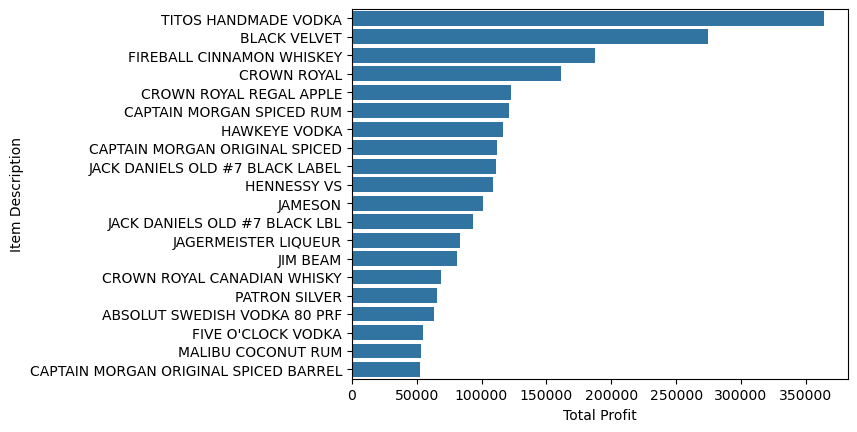

In [22]:
# create a bar plot using seaborn of the top 20 most profitable items

sns.barplot(top_profits['Total Profit'],orient = 'h')

### Problem 2

2. This question is to further explore broadcasting in NumPy.
- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [23]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

#### *In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?*

In [24]:
# x - y

The result is an error message:

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

#### *Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?*

In [25]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

Here we have turned x into a row vector and y into a column vector and we broadcast x horizontally across columns and y vertically across rows.

We end up with a (3,2) array:
$$\left[\begin{array}{c} (1-2) & (1-5) \\ (3-2) & (3-5) \\ (5-2) & (5-5) \end{array}\right] = \left[\begin{array}{c} -1 & -4 \\ 1 & -2 \\ 3 & 0 \end{array}\right]$$

#### *Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.*

In [26]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

Here we have turned x into a column vector and y into a row vector and we broadcast x vertically across rows and y horizontally across columns.

We end up with a (2,3) array:
$$\left[\begin{array}{c} (1-2) & (3-2) & (5-2)\\ (1-5) & (3-5) & (5-5)\end{array}\right] = \left[\begin{array}{c} -1 & 1 & 3 \\ -4 & -2 & 0 \end{array}\right]$$



#### *Write two double for-loops to replicate the results of the previous two answers.*

In [27]:
# x.reshape(-1,1) - y.reshape(1,-1)
ans1 = np.zeros((len(x),len(y)), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        ans1[i,j] = x[i] - y[j]
print(ans1)

print(' ')

# x.reshape(1,-1) - y.reshape(-1,1)
ans2 = np.zeros((len(y),len(x)), dtype=int)
for i in range(len(y)):
    for j in range(len(x)):
        ans2[i,j] = x[j] - y[i]
print(ans2)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]
 
[[-1  1  3]
 [-4 -2  0]]


#### *Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$*

x is a 1D array with shape (3, ): $\begin{array}{c}[ 1 & 3 & 5]\end{array}$

x.reshape(1,-1) produces 2D array with shape (1, 3): $\begin{array}{c}[[1] & [3] & [5]]\end{array}$

The 1 sets the first dimension to 1. The -1 instructs NumPy to calculate the size for the second dimension based on the total number of elements in x. So we end up with 1 row and 3 columns. This reshaping has turned x into a row vector.

x.reshape(1,-1) produces a 2D array with shape (3, 1): $\begin{array}{c}[[1] \\ [3] \\ [5]]\end{array}$

The -1 instructs NumPy to calculate the size for the first dimension based on the total number of elements in x. The 1 sets the second dimension to 1. So we end up with 3 rows and 1 column. This reshaping has turned x into a column vector.


### Problem 3

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [29]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


#### *For $x = 3$, plot the indicator function for any $z$*

#### *Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.*

#### *The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.*

#### *Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases*

### Problem 4

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

### Problem 5

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?